
# Importing Required Libraries

This section imports the necessary libraries for data manipulation, audio processing, visualization, and machine learning.

In [1]:
import numpy as np
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import os
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Loading Training Metadata

This section reads the training metadata from a CSV file and displays the first few rows along with some basic statistics about the dataset

In [2]:
df_train = pd.read_csv('metadata of train set .csv')
print(df_train.columns)
df_train.head(10)

Index(['Filename', 'File ID', 'Duration in ms', 'Class ID', 'Classname',
       'augmentation  id', 'Augmentation  type', 'source'],
      dtype='object')


,Filename,File ID,Duration in ms,Class ID,Classname,augmentation id,Augmentation type,source
0,108160-1_0_0.wav,108160,3730,0,breath,0,Orignal,https://freesound.org/
1,108160-2_0_0.wav,108160,4000,0,breath,0,Orignal,https://freesound.org/
2,108160-3_0_0.wav,108160,4000,0,breath,0,Orignal,https://freesound.org/
3,108160-4_0_0.wav,108160,2226,0,breath,0,Orignal,https://freesound.org/
4,146769-1_0_0.wav,146769,3540,0,breath,0,Orignal,https://freesound.org/
5,151215_0_0.wav,151215,3690,0,breath,0,Orignal,https://freesound.org/
6,162254-1_0_0.wav,162254,4000,0,breath,0,Orignal,https://freesound.org/
7,162254-2_0_0.wav,162254,4000,0,breath,0,Orignal,https://freesound.org/
8,164101-32_0_0.wav,164101,3860,0,breath,0,Orignal,https://freesound.org/
9,169222-1_0_0.wav,169222,3690,0,breath,0,Orignal,https://freesound.org/


## Getting info of the imported training data

Axes(0.125,0.11;0.775x0.77)
Augmentation  type
Orignal    6289
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6289 entries, 0 to 6288
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Filename        6289 non-null   object
 1   File ID         6289 non-null   object
 2   Duration in ms  6289 non-null   int64 
 3   Class ID        6289 non-null   int64 
 4   Classname       6289 non-null   object
 5   source          6289 non-null   object
dtypes: int64(2), object(4)
memory usage: 294.9+ KB
None


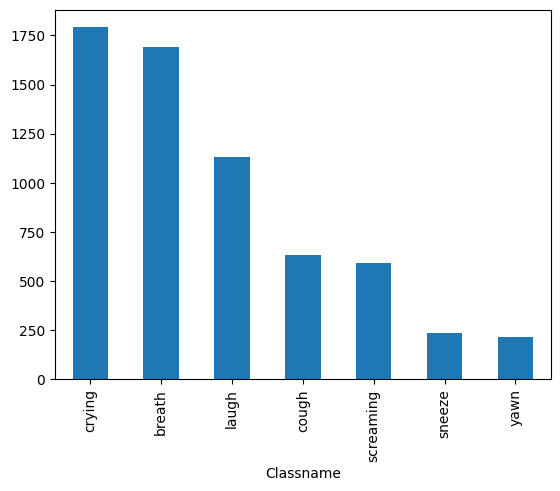

In [3]:
print(df_train['Classname'].value_counts().plot(kind='bar'))
print(df_train['Augmentation  type'].value_counts())
df_train.nunique()
df_train.drop([ 'augmentation  id','Augmentation  type'], axis=1, inplace=True)
print(df_train.info())

In [4]:
df_sample = df_train.groupby('Classname').head(10)
df_sample.reset_index(inplace=True)
df_sample.head(10)

,index,Filename,File ID,Duration in ms,Class ID,Classname,source
0,0,108160-1_0_0.wav,108160,3730,0,breath,https://freesound.org/
1,1,108160-2_0_0.wav,108160,4000,0,breath,https://freesound.org/
2,2,108160-3_0_0.wav,108160,4000,0,breath,https://freesound.org/
3,3,108160-4_0_0.wav,108160,2226,0,breath,https://freesound.org/
4,4,146769-1_0_0.wav,146769,3540,0,breath,https://freesound.org/
5,5,151215_0_0.wav,151215,3690,0,breath,https://freesound.org/
6,6,162254-1_0_0.wav,162254,4000,0,breath,https://freesound.org/
7,7,162254-2_0_0.wav,162254,4000,0,breath,https://freesound.org/
8,8,164101-32_0_0.wav,164101,3860,0,breath,https://freesound.org/
9,9,169222-1_0_0.wav,169222,3690,0,breath,https://freesound.org/


# Visualizing Audio Samples

This section loads and visualizes audio waveforms for a sample of audio files from each class.

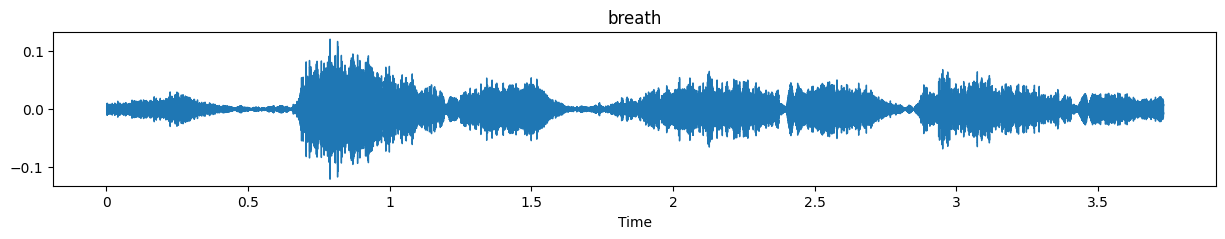

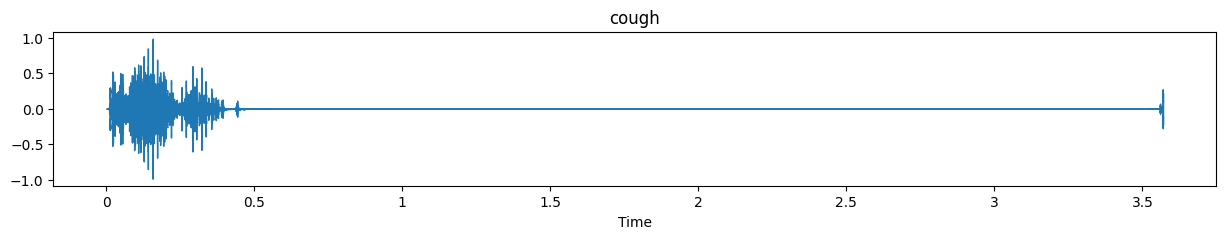

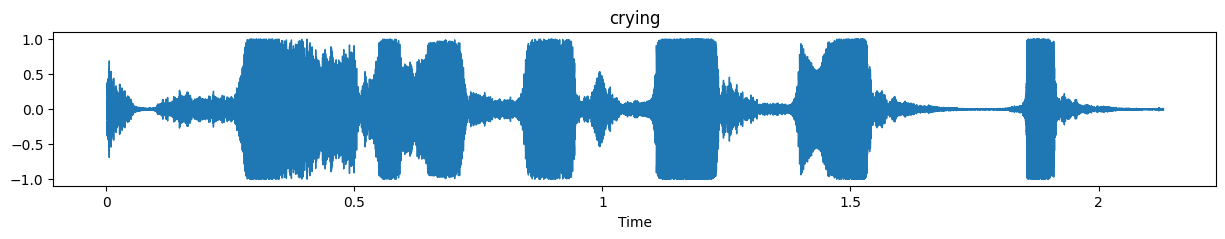

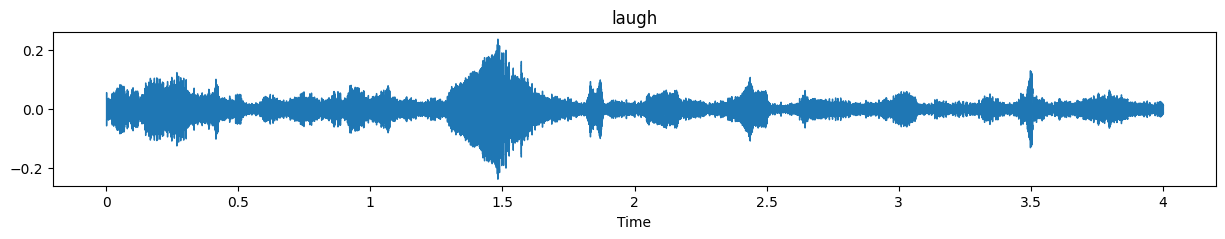

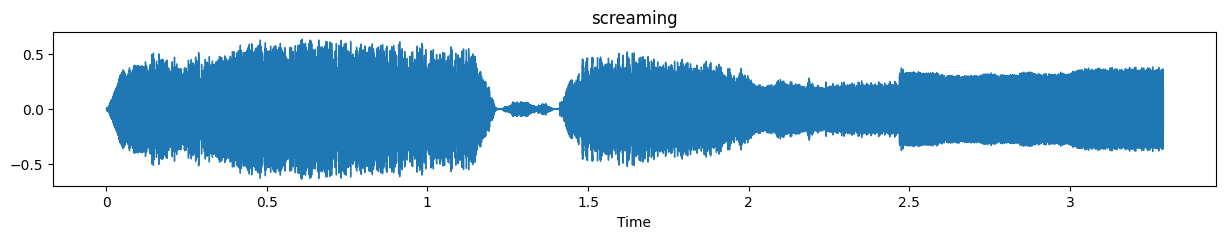

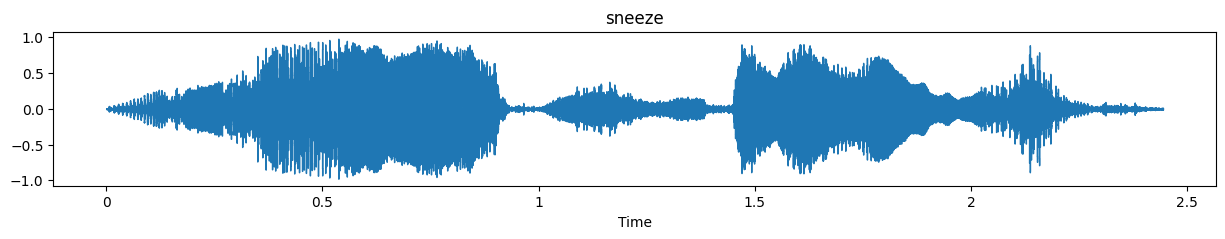

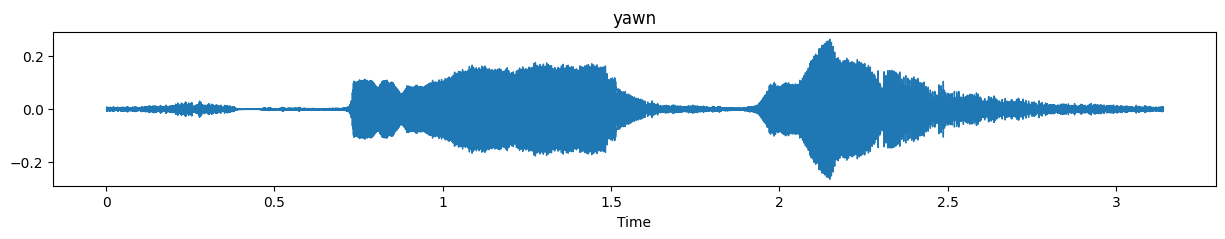

In [5]:
sounds ={}
for i in range(len(df_sample)):
    if i%10==0:
        plt.figure(figsize=(15,2))
        path = 'train/' + df_sample['Filename'][i]
        y, sr = librosa.load(path, sr=None)
        sounds[df_sample['Classname'][i]]=y
        librosa.display.waveshow(y, sr=sr)
        # plt.plot()
        plt.title(df_sample['Classname'][i])
        plt.show()
# plt.tight_layout()


I have taken some samples from each class to visualize feature extraction

In [6]:
sounds ={}
for i in range(len(df_sample)):
    path = 'train/' + df_sample['Filename'][i]
    y, sr = librosa.load(path, sr=None)
    if df_sample['Classname'][i] not in sounds:
        sounds[df_sample['Classname'][i]]=[]
    sounds[df_sample['Classname'][i]].append(y)


Taking envelope


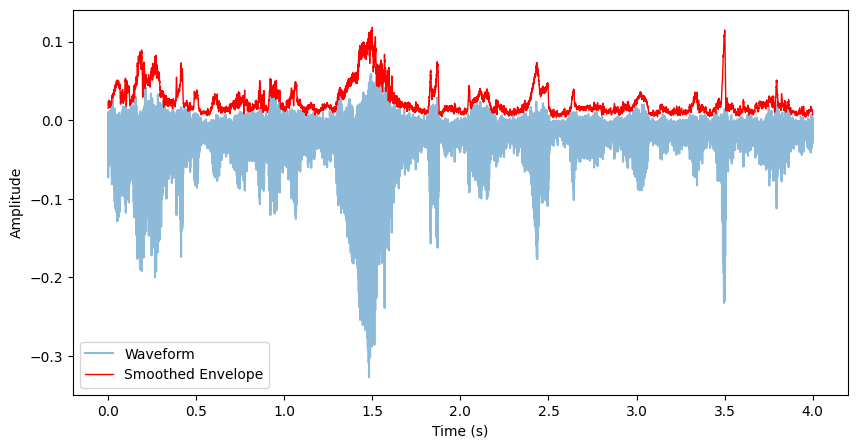

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Load an audio file
y = sounds['laugh'][0]
sr = 32000

# Compute the Hilbert transform
analytic_signal = hilbert(y)
envelope = np.abs(analytic_signal)

# Apply a moving average filter
window_size = 100  # Adjust this to control smoothing
smoothed_envelope = np.convolve(envelope, np.ones(window_size)/window_size, mode='same')

# Time axis
time = np.linspace(0, len(y) / sr, num=len(y))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(time, y-smoothed_envelope, alpha=0.5, label="Waveform")
plt.plot(time, smoothed_envelope, color='red', label="Smoothed Envelope", linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


I tried to see if i should use smoothed data but for many files on playing the files original audio was a lot morphed so I scraped the idea

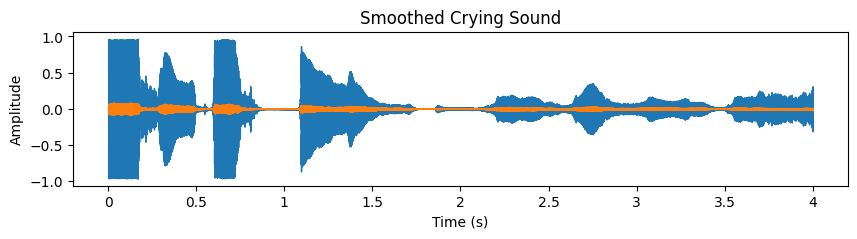

In [8]:
from IPython.display import Audio
sr = 32000
y = np.array(sounds['crying'][7])  # Replace this with your actual audio data
window_size = 100
y_smoothed = np.convolve(y, np.ones(window_size) / window_size, mode='same')  # 'same' to keep original length
plt.figure(figsize=(10, 2))
librosa.display.waveshow(y, sr=sr)
librosa.display.waveshow(y_smoothed, sr=sr)
plt.title("Smoothed Crying Sound")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
Audio(data=y, rate=sr)

# Defining Feature Extraction Function
- This section defines a function to extract various acoustic features from audio signals, including zero-crossing rate, pitch, RMS, and MFCCs.
- I used pairplot and histplot to visualize relation among various features and hoped to see some KNN styled classification

In [9]:
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

def extract_acoustic_features(y, sr):
    features = {}

    # **1. Zero-Crossing Rate (ZCR)**
    features["zcr"] = np.mean(librosa.feature.zero_crossing_rate(y))

    # **2. Pitch (Fundamental Frequency)**
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    features["pitch"] = np.mean(pitches[pitches > 0]) if np.any(pitches > 0) else 0

    # **3. Intensity (RMS Energy)**
    features["rms"] = np.mean(librosa.feature.rms(y=y))

    # **4. Duration**
    features["duration"] = librosa.get_duration(y=y, sr=sr)

    # **5. Spectral Energy Distribution**
    features["centroid"] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    features["bandwidth"] = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    features["contrast"] = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))
    features["flatness"] = np.mean(librosa.feature.spectral_flatness(y=y))
    features["rolloff"] = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

    # **6. MFCCs (Mel Frequency Cepstral Coefficients)**
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    features["mfcc"] = np.mean(mfcc, axis=1)

    # **7. Delta MFCCs (First and Second Derivatives)**
    delta_mfcc = librosa.feature.delta(mfcc)
    delta2_mfcc = librosa.feature.delta(mfcc, order=2)
    features["delta_mfcc"] = np.mean(delta_mfcc, axis=1)
    features["delta2_mfcc"] = np.mean(delta2_mfcc, axis=1)

    # **8. Spectrogram**
    spectrogram = np.abs(librosa.stft(y))
    features["spectrogram"] = np.mean(spectrogram, axis=1)

    # **9. Filter-Bank Energies (FBEs)**
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    features["fbe"] = np.mean(mel_spec, axis=1)

    return features


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List to store extracted feature dictionaries
features_list = []
labels = []

for sound in tqdm.tqdm(sounds):
    for i in range(len(sound)):
        y = sounds[sound][i]
        sr = 32000  # Ensure correct sampling rate

        # Extract features
        features = extract_acoustic_features(y, sr)

        # Add class label
        features["label"] = sound

        # Store features
        features_list.append(features)

# Convert to Pandas DataFrame
df_features = pd.DataFrame(features_list)


100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


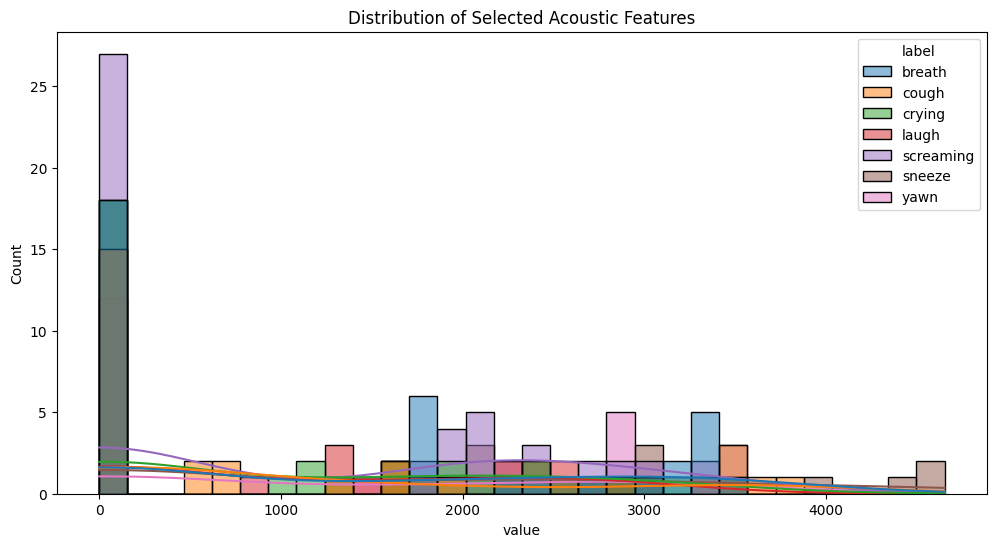

In [11]:
plt.figure(figsize=(12, 6))
selected_features = ["zcr", "rms", "pitch", "duration", "centroid", "bandwidth"]

df_melted = df_features.melt(id_vars=["label"], value_vars=selected_features)
sns.histplot(data=df_melted, x="value", hue="label", kde=True, bins=30)
plt.title("Distribution of Selected Acoustic Features")
plt.show()


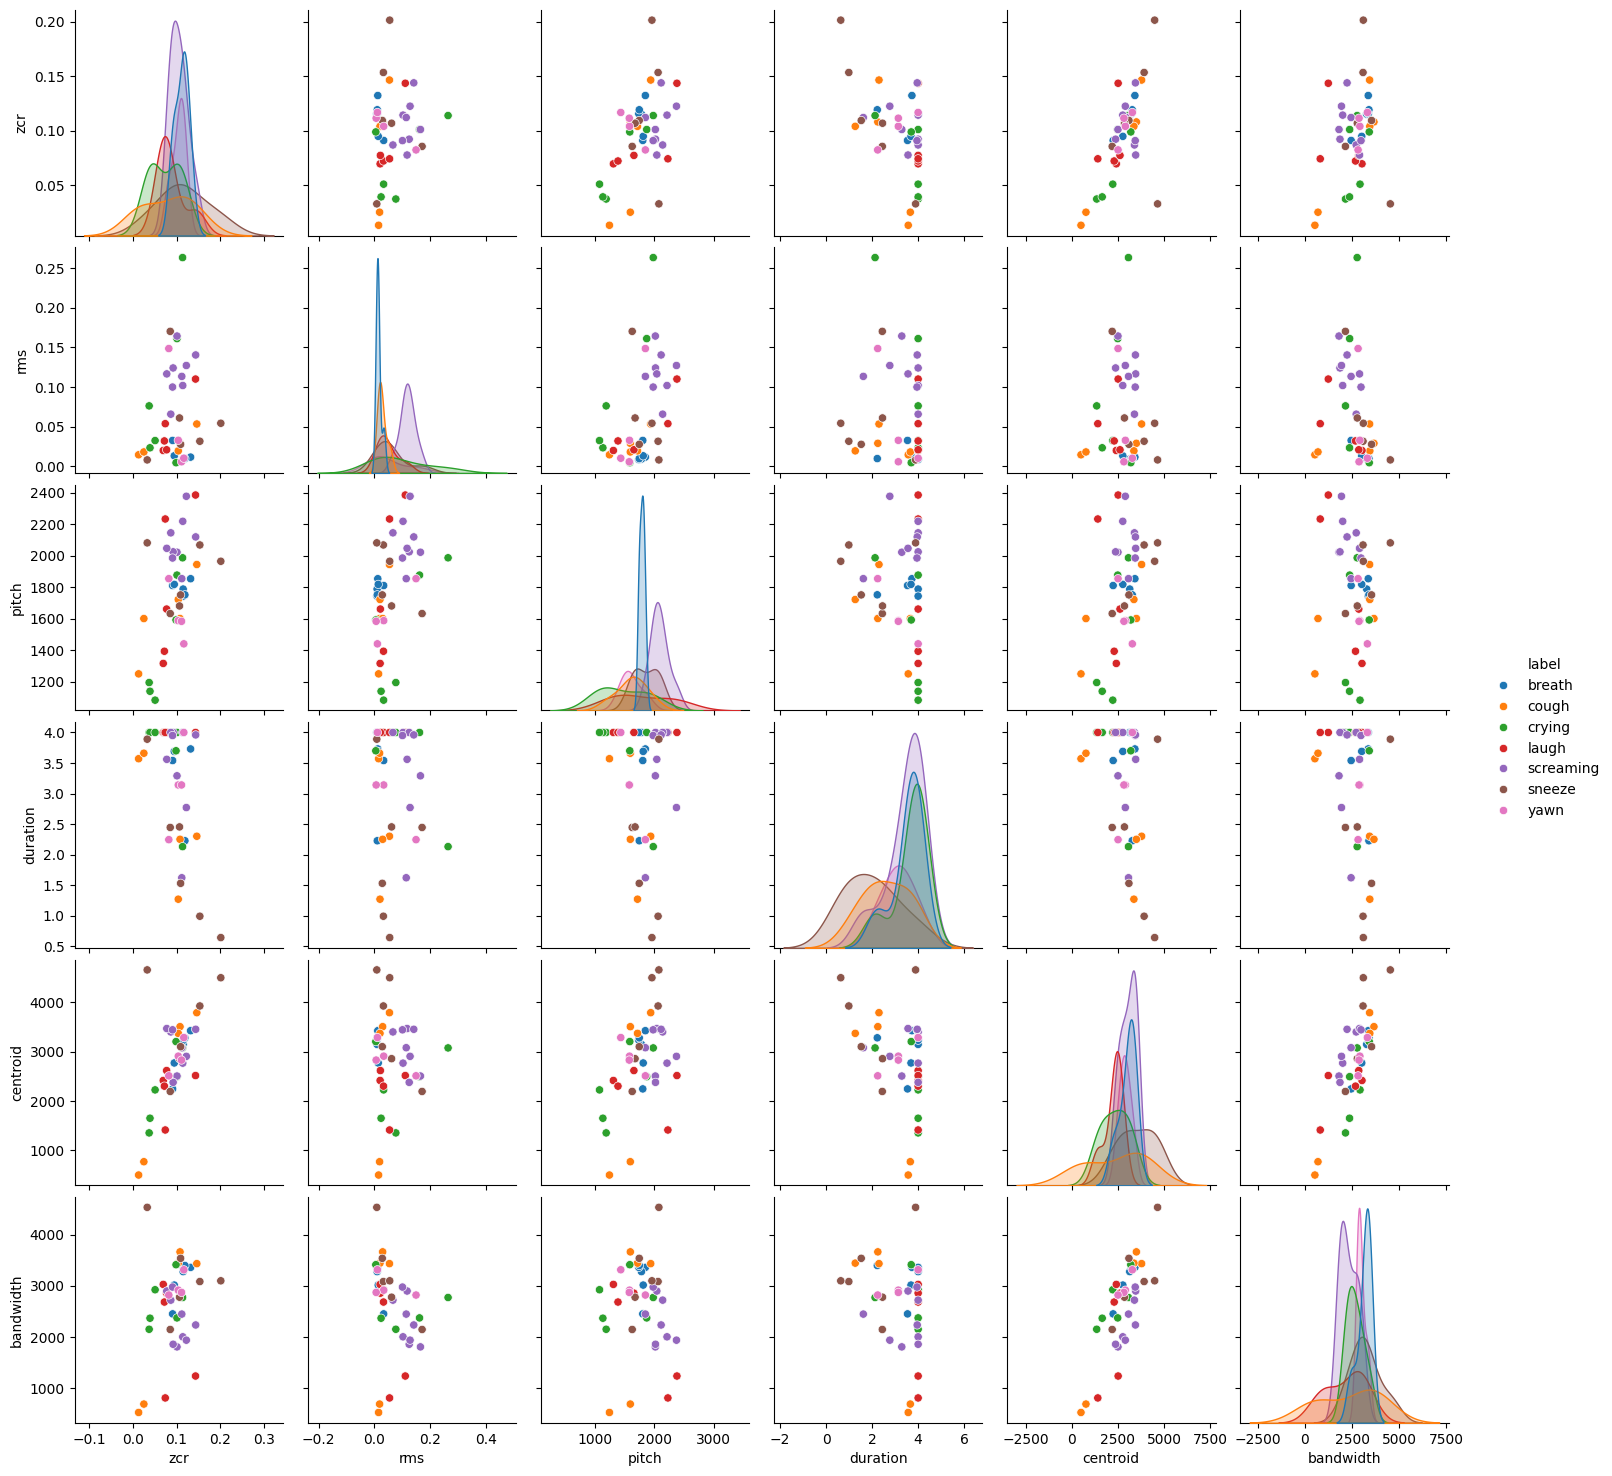

In [12]:
sns.pairplot(df_features[selected_features + ["label"]], hue="label", diag_kind="kde")
plt.show()


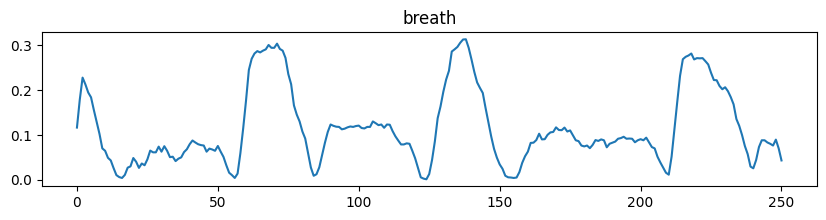

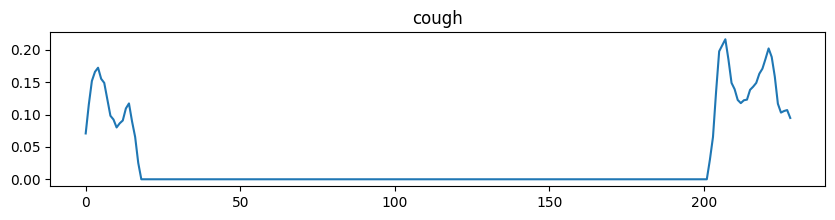

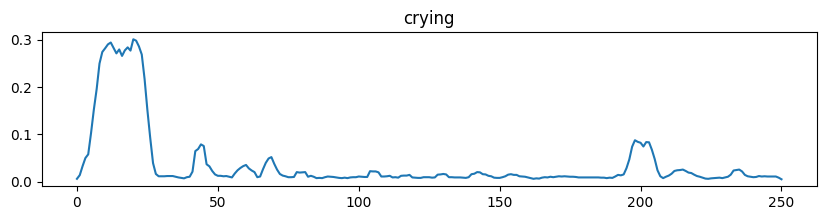

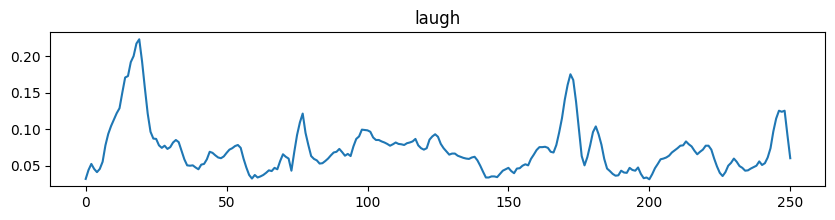

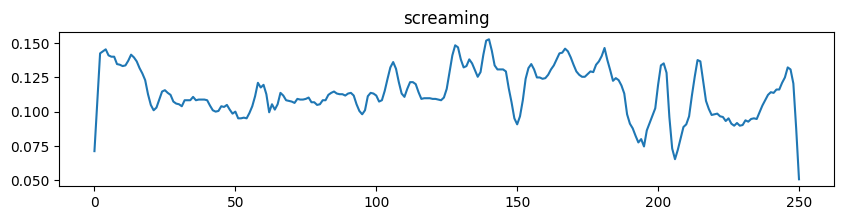

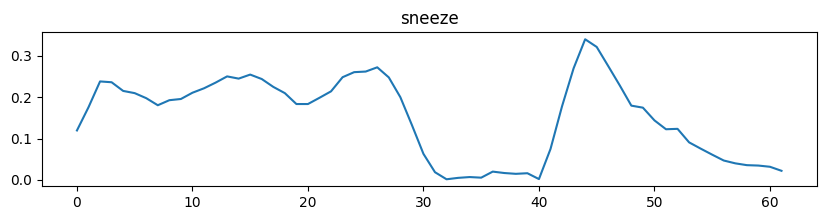

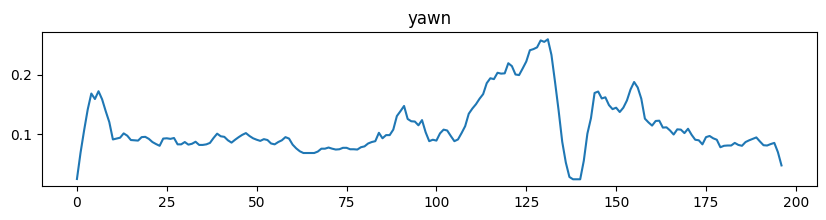

In [13]:
for sound in sounds:
    y = sounds[sound][1]
    zcr = librosa.feature.zero_crossing_rate(y)
    plt.figure(figsize=(10,2))
    plt.title(sound)
    plt.plot(np.array(zcr[0]))
plt.show()

# Extracting Features from Audio Samples
This section iterates through the audio samples, extracts features using the defined function, and stores them in a DataFrame.

In [14]:
import librosa
import numpy as np
import tqdm
from sklearn.preprocessing import StandardScaler
import librosa
import numpy as np

def extract_features(y, sr, n_mfcc=13,n_mels=128):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)  # (n_mfcc, time_frames)
    delta_mfcc = librosa.feature.delta(mfcc)  # (n_mfcc, time_frames)
    zcr = librosa.feature.zero_crossing_rate(y)  # (1, time_frames)
    rms = librosa.feature.rms(y=y)  # (1, time_frames)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)  # (1, time_frames)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)  # (1, time_frames)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)  # (1, time_frames)
    # **Mel Spectrogram**
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)  # (n_mels, time_frames)
    mel_spec_db = librosa.power_to_db(mel_spec)  # Convert to dB scale
    # **Concatenating Features (Frame-wise)**
    features = np.vstack((
        delta_mfcc,  # MFCC & Delta
        zcr, rms, spectral_centroid, spectral_bandwidth, spectral_rolloff,  # Spectral Features
        mel_spec_db  # Log-Mel Spectrogram
    ))  # Final shape: (feature_dim, time_frames)

    return features  # Shape: (feature_dim, time_frames)

def normalize_audio(y):
    """Normalize the waveform to the range [-1, 1]."""
    return y / np.max(np.abs(y)) if np.max(np.abs(y)) > 0 else y


In [ ]:
features = []
labels = []
for i, row in tqdm.tqdm(df_train.iterrows(), desc='Processing Audio', total=len(df_train)):
    path = 'train/' + row['Filename']
    y, sr = librosa.load(path,sr=8000)  # Keep original sample rate
    y = librosa.util.fix_length(y, size=8000*4)  # Ensure 4s length
    y = normalize_audio(y)
    extracted_features = extract_features(y,sr)
    features.append(extracted_features)
    labels.append(row['Class ID'])

Processing Audio: 100%|██████████| 6289/6289 [04:11<00:00, 25.02it/s]


In [16]:
# # Convert to numpy array and scale
features = np.array(features)
features.shape

(6289, 146, 63)

# Defining the CNN Model
This section defines a convolutional neural network (CNN) model architecture for audio classification.

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary

class CNNModel(nn.Module):
    def __init__(self, input_size=(146, 63), num_classes=7):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=(3, 3), stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.dropout1 = nn.Dropout(0.1)

        self.conv2 = nn.Conv2d(64, 128, kernel_size=(3, 3), stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 128, kernel_size=(3, 3), stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.dropout2 = nn.Dropout(0.1)

        self.conv4 = nn.Conv2d(128, 128, kernel_size=(3, 3), stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 128, kernel_size=(3, 3), stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))
        self.dropout3 = nn.Dropout(0.2)

        self.conv6 = nn.Conv2d(128, 256, kernel_size=(3, 3), stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.conv7 = nn.Conv2d(256, 256, kernel_size=(3, 3), stride=1, padding=1)
        self.bn7 = nn.BatchNorm2d(256)
        self.conv8 = nn.Conv2d(256, 256, kernel_size=(3, 3), stride=1, padding=1)
        self.bn8 = nn.BatchNorm2d(256)
        self.dropout4 = nn.Dropout(0.2)
        self.fc = nn.Linear(256, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Reshape (batch_size, 174, 251) → (batch_size, 1, 174, 251)

        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.dropout2(x)

        x = F.relu(self.bn4(self.conv4(x)))
        x = F.relu(self.bn5(self.conv5(x)))
        x = self.pool1(x)
        x = self.dropout3(x)

        x = F.relu(self.bn6(self.conv6(x)))
        x = F.relu(self.bn7(self.conv7(x)))
        x = F.relu(self.bn8(self.conv8(x)))

        x = torch.mean(x, dim=[2, 3])  # Global Average Pooling across height & width
        x = self.dropout4(x)
        x = self.fc(x)
        return x


# Model initialization
model = CNNModel()
summary(model, input_size=(64,146, 63))  # Batch size 64


c:\Users\91820\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [64, 7]                   --
├─Conv2d: 1-1                            [64, 64, 146, 63]         640
├─BatchNorm2d: 1-2                       [64, 64, 146, 63]         128
├─Dropout: 1-3                           [64, 64, 146, 63]         --
├─Conv2d: 1-4                            [64, 128, 146, 63]        73,856
├─BatchNorm2d: 1-5                       [64, 128, 146, 63]        256
├─Conv2d: 1-6                            [64, 128, 146, 63]        147,584
├─BatchNorm2d: 1-7                       [64, 128, 146, 63]        256
├─Dropout: 1-8                           [64, 128, 146, 63]        --
├─Conv2d: 1-9                            [64, 128, 146, 63]        147,584
├─BatchNorm2d: 1-10                      [64, 128, 146, 63]        256
├─Conv2d: 1-11                           [64, 128, 146, 63]        147,584
├─BatchNorm2d: 1-12                      [64, 128, 146, 63]  

# Handling Class Imbalance and Loading data
- This section applies WeightedRandomSampler to the training data to handle class imbalance before training the model.  
- The model was predincting only the top three classes(frequency wise) and hence performed really well on accuracy but had really poor precision and f1 score so this was an attempt to fix that
- Also I have shuffled the samples as the classIDs were in ascending order this would prevent model from learning order as a parameter


In [18]:
import torch
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torch.utils.data import TensorDataset, DataLoader,WeightedRandomSampler


# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

X = np.array(features, dtype=np.float32)
y = np.array(labels, dtype=np.int64) 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_val, y_val = shuffle(X_val, y_val, random_state=42)

class_counts = np.bincount(y_train)  # Count occurrences per class
class_weights = 1.0 / class_counts
weights = class_weights[y_train]  # Assign weights to each sample
# Create sampler
sampler = WeightedRandomSampler(weights, len(weights))

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long, device=device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32, device=device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long, device=device)

batch_size = 64  

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size,sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

Using device: cuda


In [19]:
y_train_tensor.shape

torch.Size([5660])

# Training the Model
This section trains the model on the resampled training data and validates it using early stopping.

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)  # Ensure model is on GPU
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 50
patience = 16  # Number of epochs to wait before stopping if no improvement
# best_val_loss = float('inf')
epochs_no_improve = 0
best_model_path = "best_model.pth"  # Path to save the best model

In [21]:


for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation
    model.eval()
    correct, total = 0, 0
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

    val_acc = correct / total
    print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0  # Reset counter if improvement
        torch.save(model.state_dict(), best_model_path)  # Save best model
        # print(f"Best model saved at epoch {epoch+1}.")
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print(f"Early stopping triggered after {epoch+1} epochs.")
        break  # Stop training

# Load best model after training
model.load_state_dict(torch.load(best_model_path))
print("Best model loaded for evaluation.")


Epoch 1, Loss: 129.0099, Val Loss: 24.4659, Val Acc: 0.3196
Epoch 2, Loss: 100.1711, Val Loss: 11.4488, Val Acc: 0.5628
Epoch 3, Loss: 86.3391, Val Loss: 12.6130, Val Acc: 0.5294
Epoch 4, Loss: 76.4414, Val Loss: 9.9673, Val Acc: 0.6359
Epoch 5, Loss: 66.5457, Val Loss: 7.7313, Val Acc: 0.7552
Epoch 6, Loss: 61.7968, Val Loss: 9.1570, Val Acc: 0.6471
Epoch 7, Loss: 58.2867, Val Loss: 6.7376, Val Acc: 0.7536
Epoch 8, Loss: 53.2296, Val Loss: 7.3371, Val Acc: 0.7393
Epoch 9, Loss: 51.3527, Val Loss: 11.9999, Val Acc: 0.6359
Epoch 10, Loss: 49.5617, Val Loss: 11.8857, Val Acc: 0.6153
Epoch 11, Loss: 47.2764, Val Loss: 7.9757, Val Acc: 0.7504
Epoch 12, Loss: 45.8643, Val Loss: 6.3915, Val Acc: 0.7917
Epoch 13, Loss: 41.4140, Val Loss: 5.6906, Val Acc: 0.7742
Epoch 14, Loss: 40.1913, Val Loss: 8.5860, Val Acc: 0.7409
Epoch 15, Loss: 37.4525, Val Loss: 6.1458, Val Acc: 0.7854
Epoch 16, Loss: 35.6194, Val Loss: 5.7045, Val Acc: 0.8060
Epoch 17, Loss: 35.7938, Val Loss: 6.3535, Val Acc: 0.7806

In [22]:
torch.cuda.empty_cache()
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      | 277595 KiB |   4762 MiB |  78064 GiB |  78064 GiB |
|       from large pool | 269358 KiB |   4756 MiB |  78039 GiB |  78039 GiB |
|       from small pool |   8237 KiB |     11 MiB |     24 GiB |     24 GiB |
|---------------------------------------------------------------------------|
| Active memory         | 277595 KiB |   4762 MiB |  78064 GiB |  78064 GiB |
|       from large pool | 269358 KiB |   4756 MiB |  78039 GiB |

# Loading and Standardizing Test Features
This section loads the test audio files, extracts features, and standardizes them for evaluation.

In [23]:
df_test =pd.read_csv('metadata of test set.csv')
df_test.drop([ 'Augment Id','Augmentation type'], axis=1, inplace=True)
df_test.head(5)

,Filename,File_ID,Durationin ms,Class_id,Classname,source
0,112557-2_0_0.wav,112557,4000,0,breath,https://freesound.org/
1,112557-3_0_0.wav,112557,3950,0,breath,https://freesound.org/
2,112557-4_0_0.wav,112557,3910,0,breath,https://freesound.org/
3,140301_0_0.wav,140301,2261,0,breath,https://freesound.org/
4,144128-1_0_0.wav,144128,3770,0,breath,https://freesound.org/


In [24]:
features_test = []
labels_test = []

for i, row in tqdm.tqdm(df_test.iterrows(), desc='Loading : ', total=len(df_test)):
    path = 'test/' + row['Filename']
    y,sr=librosa.load(path,sr=8000)
    y = librosa.util.fix_length(y, size=8000*4)  # Ensure 4s length
    y = normalize_audio(y)
    extracted_features_test = extract_features(y,sr)
    features_test.append(extracted_features_test)
    labels_test.append(row['Class_id'])
 

Loading : 100%|██████████| 725/725 [00:20<00:00, 34.91it/s]


In [25]:
# Convert to NumPy array
features_test = np.array(features_test)
print("Final Feature Shape:", features_test.shape)
X_test =features_test
y_test =labels_test
X_test = np.array(X_test) 
y_test = np.array(y_test) 


Final Feature Shape: (725, 146, 63)


# Evaluating Model Performance
This section evaluates the model's performance on the test data using precision, recall, F1 score, and confusion matrix.

In [26]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)  # Assuming labels are integers

# Move tensors to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

model.eval()

# Disable gradient computation for testing
with torch.no_grad():
    outputs = model(X_test_tensor)  # Forward pass
    test_loss = criterion(outputs, y_test_tensor)  # Compute loss
    y_pred_classes = torch.argmax(outputs, dim=1)  # Get predicted class
    correct = (y_pred_classes == y_test_tensor).sum().item()
    total = y_test_tensor.size(0)
    test_acc = correct / total  # Compute accuracy


# Move tensors to CPU and convert to NumPy arrays
y_test_np = y_test_tensor.cpu().numpy()
y_pred_np = y_pred_classes.cpu().numpy()

# Compute precision, recall, and F1-score
precision = precision_score(y_test_np, y_pred_np, average='weighted')
recall = recall_score(y_test_np, y_pred_np, average='weighted')
f1 = f1_score(y_test_np, y_pred_np, average='weighted')

# Print classification report
print(classification_report(y_test_np, y_pred_np))
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       160
           1       0.78      0.74      0.76        70
           2       0.85      0.80      0.83       205
           3       0.81      0.91      0.86       140
           4       0.92      0.81      0.86        70
           5       0.59      0.90      0.71        30
           6       0.67      0.90      0.77        50

    accuracy                           0.82       725
   macro avg       0.79      0.84      0.81       725
weighted avg       0.84      0.82      0.83       725

Test Loss: 0.5746, Test Accuracy: 0.8248
Precision: 0.8391
Recall: 0.8248
F1 Score: 0.8269


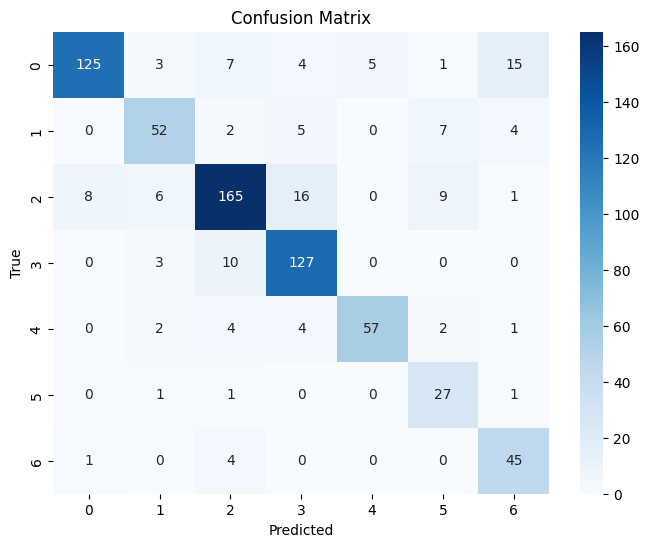

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import torch

# Ensure predictions and true labels are on CPU and converted to numpy
y_pred_classes = y_pred_classes.cpu().numpy() if isinstance(y_pred_classes, torch.Tensor) else y_pred_classes
# y_true = y_test.cpu().numpy() if isinstance(y_test, torch.Tensor) else y_test

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(7), yticklabels=range(7))

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# Potential Improvements
- We can use a higher sampling rate instead of 8KHz
- We can increase the number of mel_spectrogram
- Changing number of mfcc increased the F1 score from .71 to .8269
- We can use other models such as LSTM with CNN to further improve accuracy
- We should have more number of samples of classes with lower frequency to improve the class boundary detection in classification

Name-Rachit Agarwal  
Roll no.- 230820  
Thank You!!